# What do our likelihood surfaces look like?

Bayes:

$$ p(\theta | d) \propto p(d|\theta) \pi(\theta)$$

For a uniform prior, the posterior will look like the likelihood, modulo a normalization factor.

Lets see what some of our univariate likelihood curves look like (i.e. holding all other parameters constant)

In [40]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [41]:
import sys
try:
    sys.path.remove("../py_src") # Hacky way to add higher directory to python modules path. 
except:
    pass
sys.path.append("../py_src") # Means that I dont have to make src/ a proper python package

In [42]:
from system_parameters import SystemParameters
from pulsars import Pulsars

from synthetic_data import SyntheticData
from plotting import plot_statespace,plot_all
from model import LinearModel
from kalman_filter import KalmanFilter
from bilby_wrapper import BilbySampler
from priors import priors_dict,bilby_priors_dict

### 1. Example system

***Welcome to the Kalman Filter Nested Sampler for PTA GW systems***
Attention: You are including the PSR terms in your synthetic data generation
No heterodyne corrections
Running the KF with non-heterodyned settings
{'omega_gw': 5e-07, 'phi0_gw': 0.2, 'psi_gw': 2.5, 'iota_gw': 1.0, 'delta_gw': 1.0, 'alpha_gw': 1.0, 'h': 1e-08, 'f00': 327.8470205611185, 'f01': 205.53069910059, 'f02': 303.0909794113198, 'f03': 326.600561967271, 'f04': 348.5592316999902, 'f05': 112.94972319066429, 'f06': 346.5319964932129, 'f07': 215.6088104676294, 'f08': 190.2678373613727, 'f09': 193.7156834116254, 'f010': 238.004053174088, 'f011': 172.642909924795, 'f012': 125.2002451675204, 'f013': 277.9377069492822, 'f014': 317.3789419337929, 'f015': 316.12398422451724, 'f016': 216.3733370950632, 'f017': 218.811840394717, 'f018': 170.93736991146392, 'f019': 266.8691669720664, 'f020': 245.4261196602377, 'f021': 607.6775384652, 'f022': 367.7671211299739, 'f023': 244.391377738396, 'f024': 186.4940783438289, 'f025': 465.

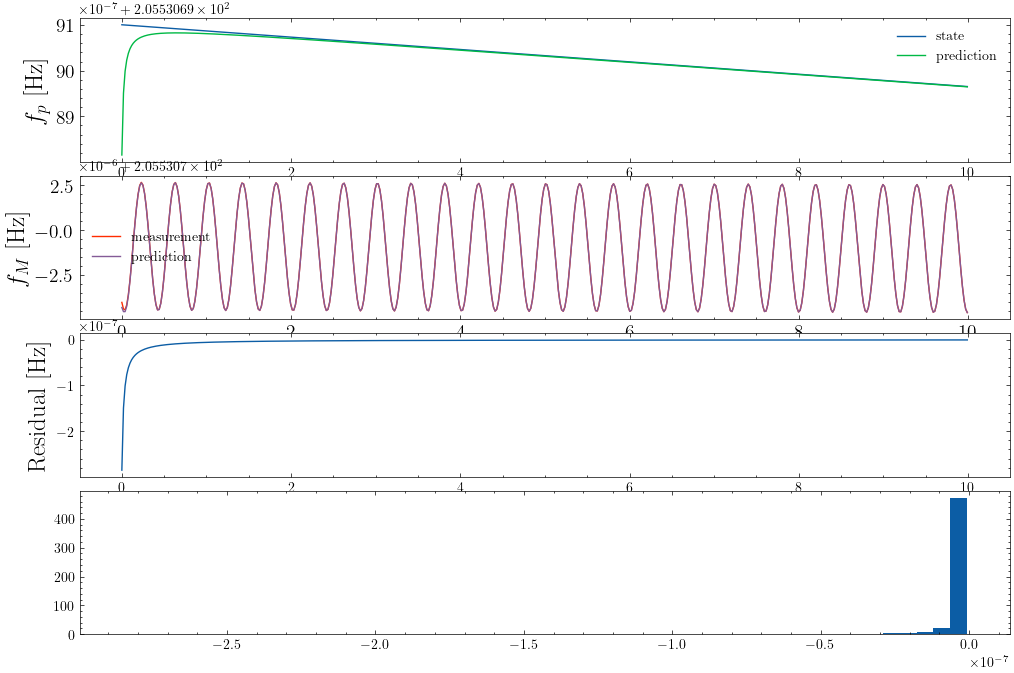

In [55]:
# Example Setup
P   = SystemParameters(h=1e-8,σp=0.0,σm=1e-13,use_psr_terms_in_data=True,measurement_model="pulsar",Npsr=0)       # define the system parameters as a class
PTA = Pulsars(P)               #setup the PTA
data = SyntheticData(PTA,P) #generate some synthetic data


#Define the model 
model = LinearModel(P)


#Initialise the Kalman filter
KF = KalmanFilter(model,data.f_measured,PTA,P["heterodyne"], P["heterodyne_scale_factor"])


#Run the KF once with the correct parameters.
#This allows JIT precompile
guessed_parameters = priors_dict(PTA,P)
guessed_parameters["sigma_m"] = 1e-1
print(guessed_parameters)
model_likelihood,xres,yres = KF.likelihood(guessed_parameters)
print("Ideal likelihood = ", model_likelihood)
plot_all(PTA.t, data.intrinsic_frequency, data.f_measured, xres,yres, 1,savefig='example_system.png')


---


### 2. Likelihood curves

In [53]:
from plotting import iterate_over_priors


import matplotlib.pyplot as plt 
def plot_likelihood(x,y,x_logscale,y_logscale,variable_name,x_critical,savefig):

    h,w = 12,8
    rows = 1
    cols = 1
    fig, ax = plt.subplots(nrows=rows, ncols=cols, figsize=(h,w),sharex=False)

    ax.plot(x,y)

    if x_logscale:
        ax.set_xscale('log')
    if y_logscale:
        ax.set_yscale('log')

    ax.axvline(x_critical,linestyle='--', c='C2')

    ax.set_xlabel(variable_name)
    ax.set_ylabel("likelihood")


    if savefig != None:
        plt.savefig(f"../data/images/{savefig}.png", bbox_inches="tight",dpi=300)

    plt.show()



---


#### 2.1 GW source declination - $\delta$ 

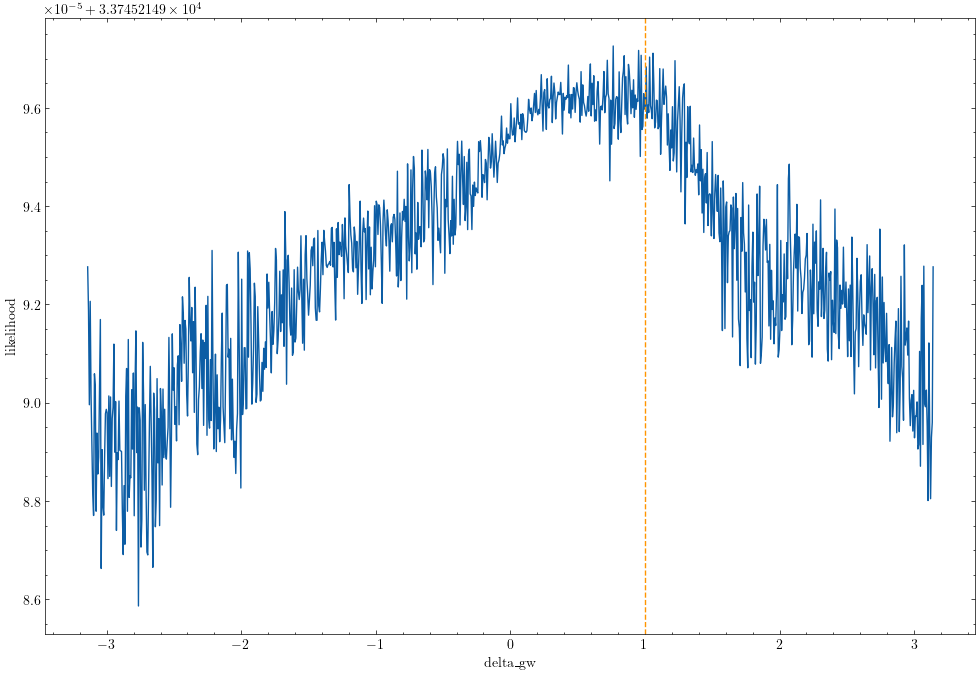

In [56]:
import numpy as np 
variable = "delta_gw"
variable_range = np.linspace(-np.pi,np.pi,int(1e3))
likelihoods = iterate_over_priors(variable, variable_range,guessed_parameters,KF)
plot_likelihood(variable_range,likelihoods,False,False,variable,guessed_parameters[variable],savefig='likelihood_delta_1')


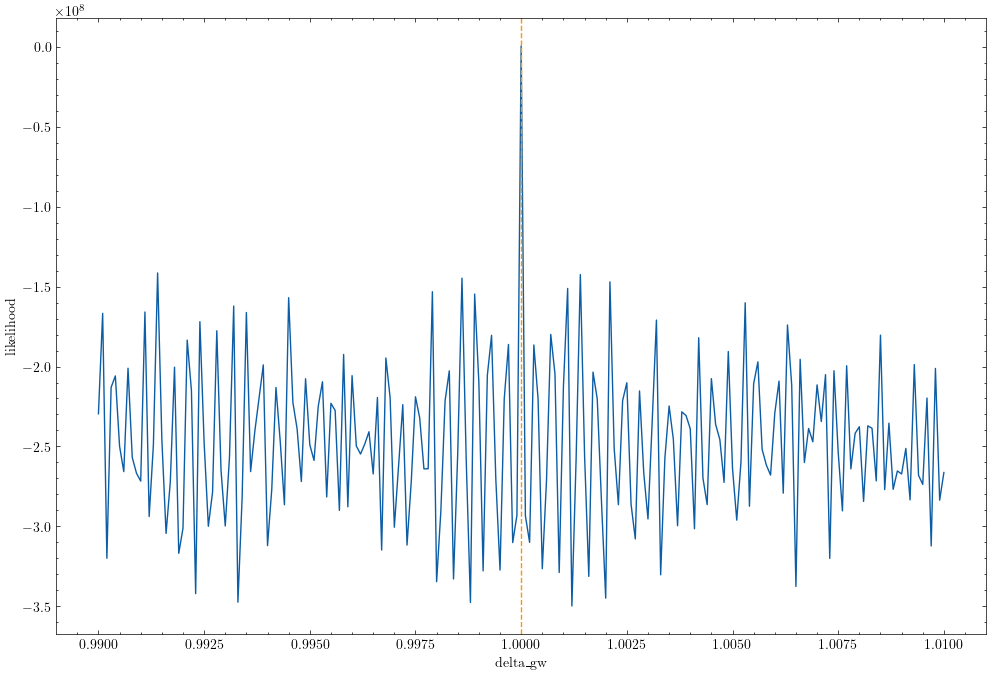

In [50]:
variable = "delta_gw"
variable_range = np.arange(0.99,1.01,0.0001)
likelihoods = iterate_over_priors(variable, variable_range,guessed_parameters,KF)
plot_likelihood(variable_range,likelihoods,False,False,variable,guessed_parameters[variable],savefig='likelihood_delta_2')


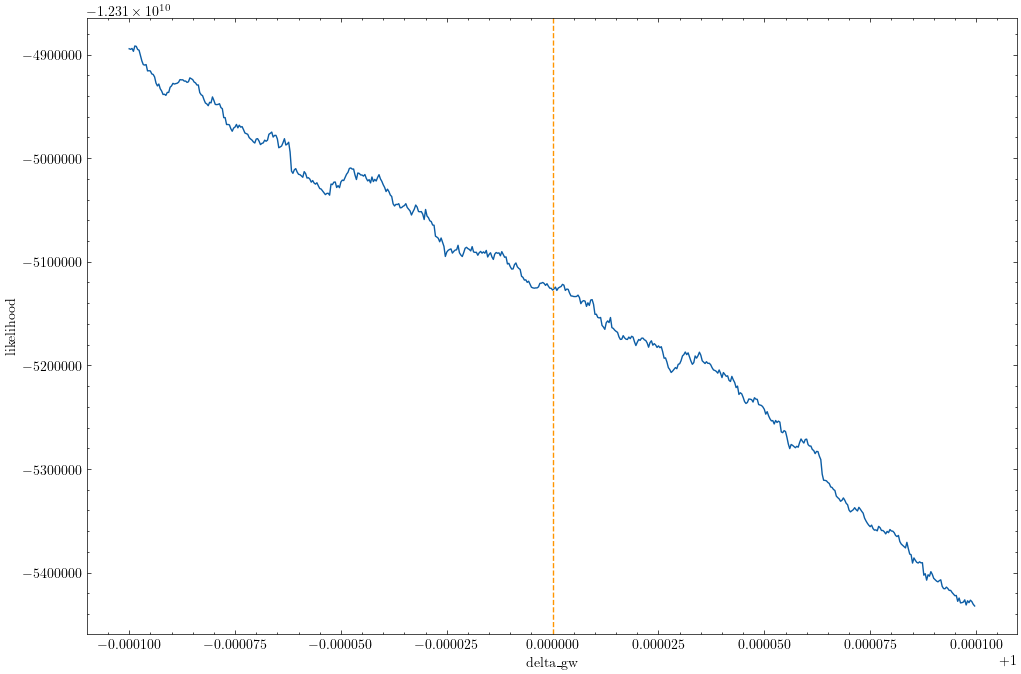

In [36]:
variable = "delta_gw"
eps = 1e-4
variable_range = np.arange(1.0-eps,1.0+eps,eps/300.0)
likelihoods = iterate_over_priors(variable, variable_range,guessed_parameters,KF)
plot_likelihood(variable_range,likelihoods,False,False,variable,guessed_parameters[variable],savefig='likelihood_delta_3')


---


#### 2.2 GW source angular frequency - $\omega$ 

The R matrix looks like: 1e-26
Initial guess of the states: [186.49407834 367.76712113]
The R matrix looks like: 1e-26
Initial guess of the states: [186.49407834 367.76712113]
The R matrix looks like: 1e-26
Initial guess of the states: [186.49407834 367.76712113]
The R matrix looks like: 1e-26
Initial guess of the states: [186.49407834 367.76712113]
The R matrix looks like: 1e-26
Initial guess of the states: [186.49407834 367.76712113]
The R matrix looks like: 1e-26
Initial guess of the states: [186.49407834 367.76712113]
The R matrix looks like: 1e-26
Initial guess of the states: [186.49407834 367.76712113]
The R matrix looks like: 1e-26
Initial guess of the states: [186.49407834 367.76712113]
The R matrix looks like: 1e-26
Initial guess of the states: [186.49407834 367.76712113]
The R matrix looks like: 1e-26
Initial guess of the states: [186.49407834 367.76712113]
The R matrix looks like: 1e-26
Initial guess of the states: [186.49407834 367.76712113]
The R matrix looks like: 1e-26
I

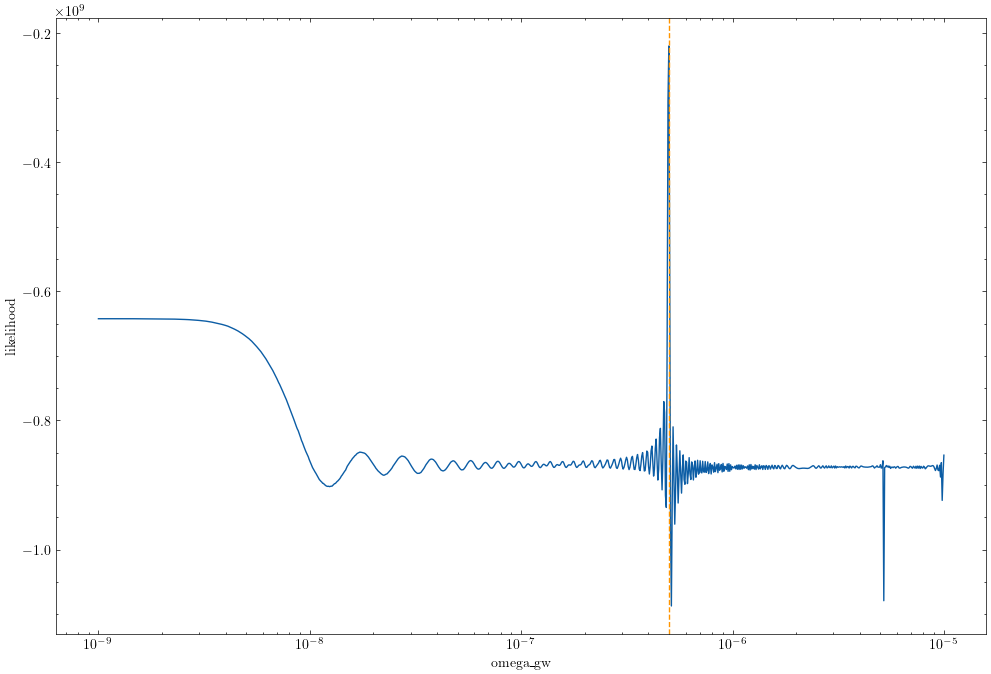

In [19]:
variable = "omega_gw"
variable_range = np.logspace(-9,-5,int(1e3))
likelihoods = iterate_over_priors(variable, variable_range,guessed_parameters,KF)
plot_likelihood(variable_range,likelihoods,True,False,variable,guessed_parameters[variable],savefig='likelihood_omega_1')


In [20]:
i=990
variable_range[i] - variable_range[i-1]

8.446439815893178e-08

The R matrix looks like: 1e-26
Initial guess of the states: [186.49407834 367.76712113]
The R matrix looks like: 1e-26
Initial guess of the states: [186.49407834 367.76712113]
The R matrix looks like: 1e-26
Initial guess of the states: [186.49407834 367.76712113]
The R matrix looks like: 1e-26
Initial guess of the states: [186.49407834 367.76712113]
The R matrix looks like: 1e-26
Initial guess of the states: [186.49407834 367.76712113]
The R matrix looks like: 1e-26
Initial guess of the states: [186.49407834 367.76712113]
The R matrix looks like: 1e-26
Initial guess of the states: [186.49407834 367.76712113]
The R matrix looks like: 1e-26
Initial guess of the states: [186.49407834 367.76712113]
The R matrix looks like: 1e-26
Initial guess of the states: [186.49407834 367.76712113]
The R matrix looks like: 1e-26
Initial guess of the states: [186.49407834 367.76712113]
The R matrix looks like: 1e-26
Initial guess of the states: [186.49407834 367.76712113]
The R matrix looks like: 1e-26
I

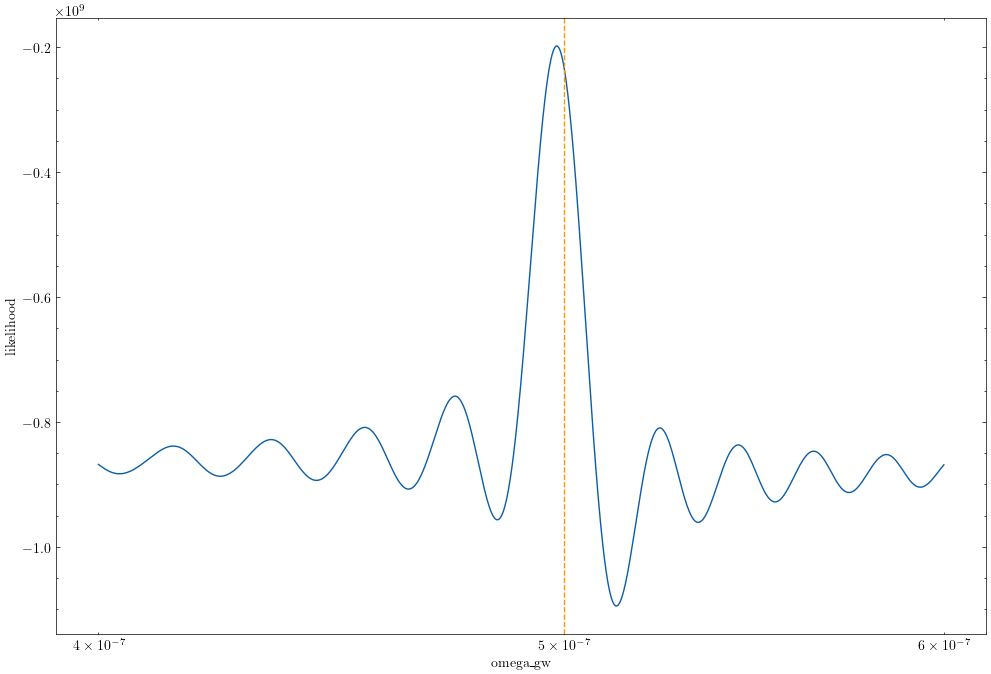

In [21]:
variable = "omega_gw"
variable_range = np.arange(4e-7,6e-7,1e-10)
likelihoods = iterate_over_priors(variable, variable_range,guessed_parameters,KF)
plot_likelihood(variable_range,likelihoods,True,False,variable,guessed_parameters[variable],savefig='likelihood_omega_2')


The R matrix looks like: 1e-26
Initial guess of the states: [186.49407834 367.76712113]
The R matrix looks like: 1e-26
Initial guess of the states: [186.49407834 367.76712113]
The R matrix looks like: 1e-26
Initial guess of the states: [186.49407834 367.76712113]
The R matrix looks like: 1e-26
Initial guess of the states: [186.49407834 367.76712113]
The R matrix looks like: 1e-26
Initial guess of the states: [186.49407834 367.76712113]
The R matrix looks like: 1e-26
Initial guess of the states: [186.49407834 367.76712113]
The R matrix looks like: 1e-26
Initial guess of the states: [186.49407834 367.76712113]
The R matrix looks like: 1e-26
Initial guess of the states: [186.49407834 367.76712113]
The R matrix looks like: 1e-26
Initial guess of the states: [186.49407834 367.76712113]
The R matrix looks like: 1e-26
Initial guess of the states: [186.49407834 367.76712113]
The R matrix looks like: 1e-26
Initial guess of the states: [186.49407834 367.76712113]
The R matrix looks like: 1e-26
I

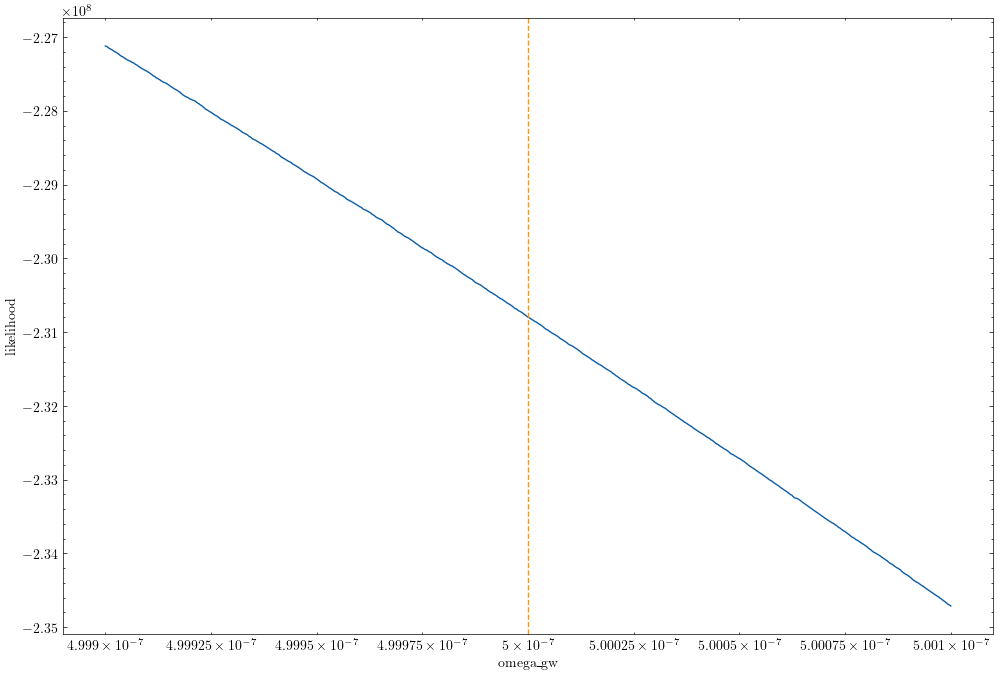

In [22]:
variable = "omega_gw"
eps = 1e-10
variable_range = np.arange(5e-7-eps,5e-7+eps,eps/500.0)
likelihoods = iterate_over_priors(variable, variable_range,guessed_parameters,KF)
plot_likelihood(variable_range,likelihoods,True,False,variable,guessed_parameters[variable],savefig='likelihood_omega_3')


#### 2.3 GW source phase offset - $\Phi_0$

The R matrix looks like: 1e-26
Initial guess of the states: [186.49407834 367.76712113]
The R matrix looks like: 1e-26
Initial guess of the states: [186.49407834 367.76712113]
The R matrix looks like: 1e-26
Initial guess of the states: [186.49407834 367.76712113]
The R matrix looks like: 1e-26
Initial guess of the states: [186.49407834 367.76712113]
The R matrix looks like: 1e-26
Initial guess of the states: [186.49407834 367.76712113]
The R matrix looks like: 1e-26
Initial guess of the states: [186.49407834 367.76712113]
The R matrix looks like: 1e-26
Initial guess of the states: [186.49407834 367.76712113]
The R matrix looks like: 1e-26
Initial guess of the states: [186.49407834 367.76712113]
The R matrix looks like: 1e-26
Initial guess of the states: [186.49407834 367.76712113]
The R matrix looks like: 1e-26
Initial guess of the states: [186.49407834 367.76712113]
The R matrix looks like: 1e-26
Initial guess of the states: [186.49407834 367.76712113]
The R matrix looks like: 1e-26
I

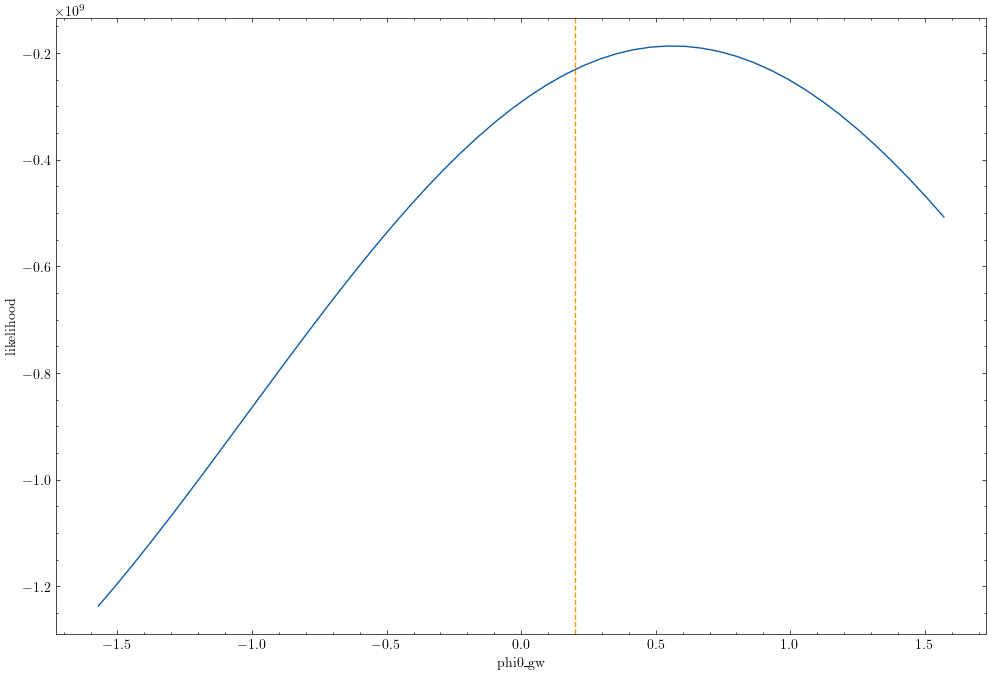

In [23]:
variable = "phi0_gw"
variable_range = np.linspace(-np.pi/2,np.pi/2)
likelihoods = iterate_over_priors(variable, variable_range,guessed_parameters,KF)
plot_likelihood(variable_range,likelihoods,False,False,variable,guessed_parameters[variable],savefig=None)


The R matrix looks like: 1e-26
Initial guess of the states: [186.49407834 367.76712113]
The R matrix looks like: 1e-26
Initial guess of the states: [186.49407834 367.76712113]
The R matrix looks like: 1e-26
Initial guess of the states: [186.49407834 367.76712113]
The R matrix looks like: 1e-26
Initial guess of the states: [186.49407834 367.76712113]
The R matrix looks like: 1e-26
Initial guess of the states: [186.49407834 367.76712113]
The R matrix looks like: 1e-26
Initial guess of the states: [186.49407834 367.76712113]
The R matrix looks like: 1e-26
Initial guess of the states: [186.49407834 367.76712113]
The R matrix looks like: 1e-26
Initial guess of the states: [186.49407834 367.76712113]
The R matrix looks like: 1e-26
Initial guess of the states: [186.49407834 367.76712113]
The R matrix looks like: 1e-26
Initial guess of the states: [186.49407834 367.76712113]
The R matrix looks like: 1e-26
Initial guess of the states: [186.49407834 367.76712113]
The R matrix looks like: 1e-26
I

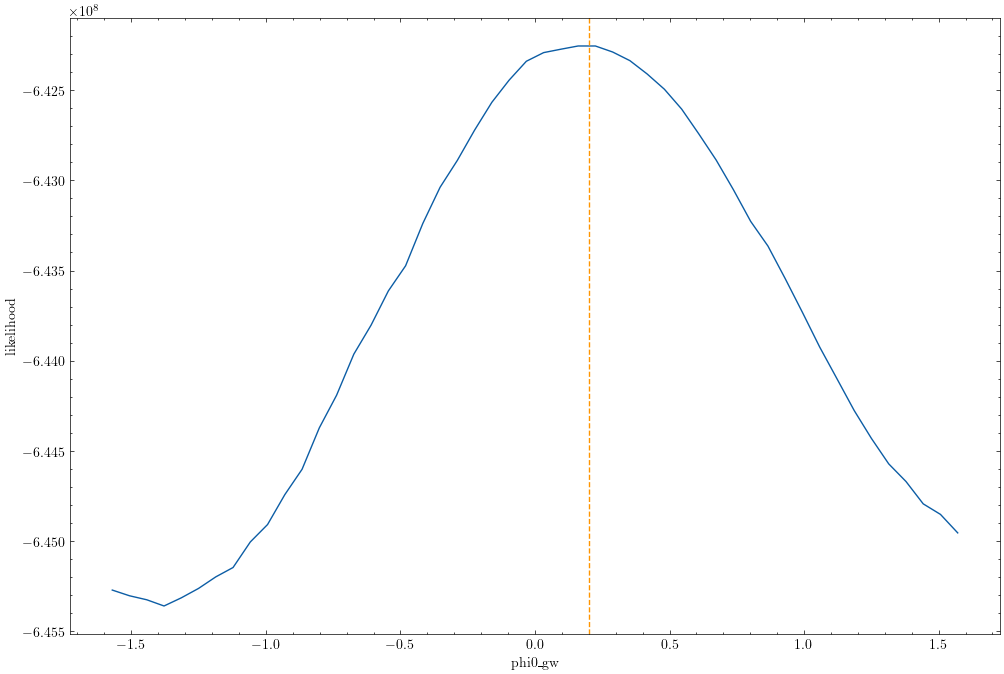

In [24]:
variable = "phi0_gw"
variable_range = np.linspace(-np.pi/2,np.pi/2)
wrong_parameters = guessed_parameters.copy()
wrong_parameters["omega_gw"] = 1e-9
wrong_parameters["alpha_gw"] = 0.20
wrong_parameters["delta_gw"] = 0.20


likelihoods = iterate_over_priors(variable, variable_range,wrong_parameters,KF)
plot_likelihood(variable_range,likelihoods,False,False,variable,guessed_parameters[variable],savefig=None)


### 3. All likelihood curves for $\bar{\theta}_{GW}$

0 omega_gw 5e-07
The R matrix looks like: 1e-26
Initial guess of the states: [186.49407834 367.76712113]
The R matrix looks like: 1e-26
Initial guess of the states: [186.49407834 367.76712113]
The R matrix looks like: 1e-26
Initial guess of the states: [186.49407834 367.76712113]
The R matrix looks like: 1e-26
Initial guess of the states: [186.49407834 367.76712113]
The R matrix looks like: 1e-26
Initial guess of the states: [186.49407834 367.76712113]
The R matrix looks like: 1e-26
Initial guess of the states: [186.49407834 367.76712113]
The R matrix looks like: 1e-26
Initial guess of the states: [186.49407834 367.76712113]
The R matrix looks like: 1e-26
Initial guess of the states: [186.49407834 367.76712113]
The R matrix looks like: 1e-26
Initial guess of the states: [186.49407834 367.76712113]
The R matrix looks like: 1e-26
Initial guess of the states: [186.49407834 367.76712113]
The R matrix looks like: 1e-26
Initial guess of the states: [186.49407834 367.76712113]
The R matrix lo

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


The R matrix looks like: 1e-26
Initial guess of the states: [186.49407834 367.76712113]
The R matrix looks like: 1e-26
Initial guess of the states: [186.49407834 367.76712113]
The R matrix looks like: 1e-26
Initial guess of the states: [186.49407834 367.76712113]
The R matrix looks like: 1e-26
Initial guess of the states: [186.49407834 367.76712113]
The R matrix looks like: 1e-26
Initial guess of the states: [186.49407834 367.76712113]
The R matrix looks like: 1e-26
Initial guess of the states: [186.49407834 367.76712113]
The R matrix looks like: 1e-26
Initial guess of the states: [186.49407834 367.76712113]
The R matrix looks like: 1e-26
Initial guess of the states: [186.49407834 367.76712113]


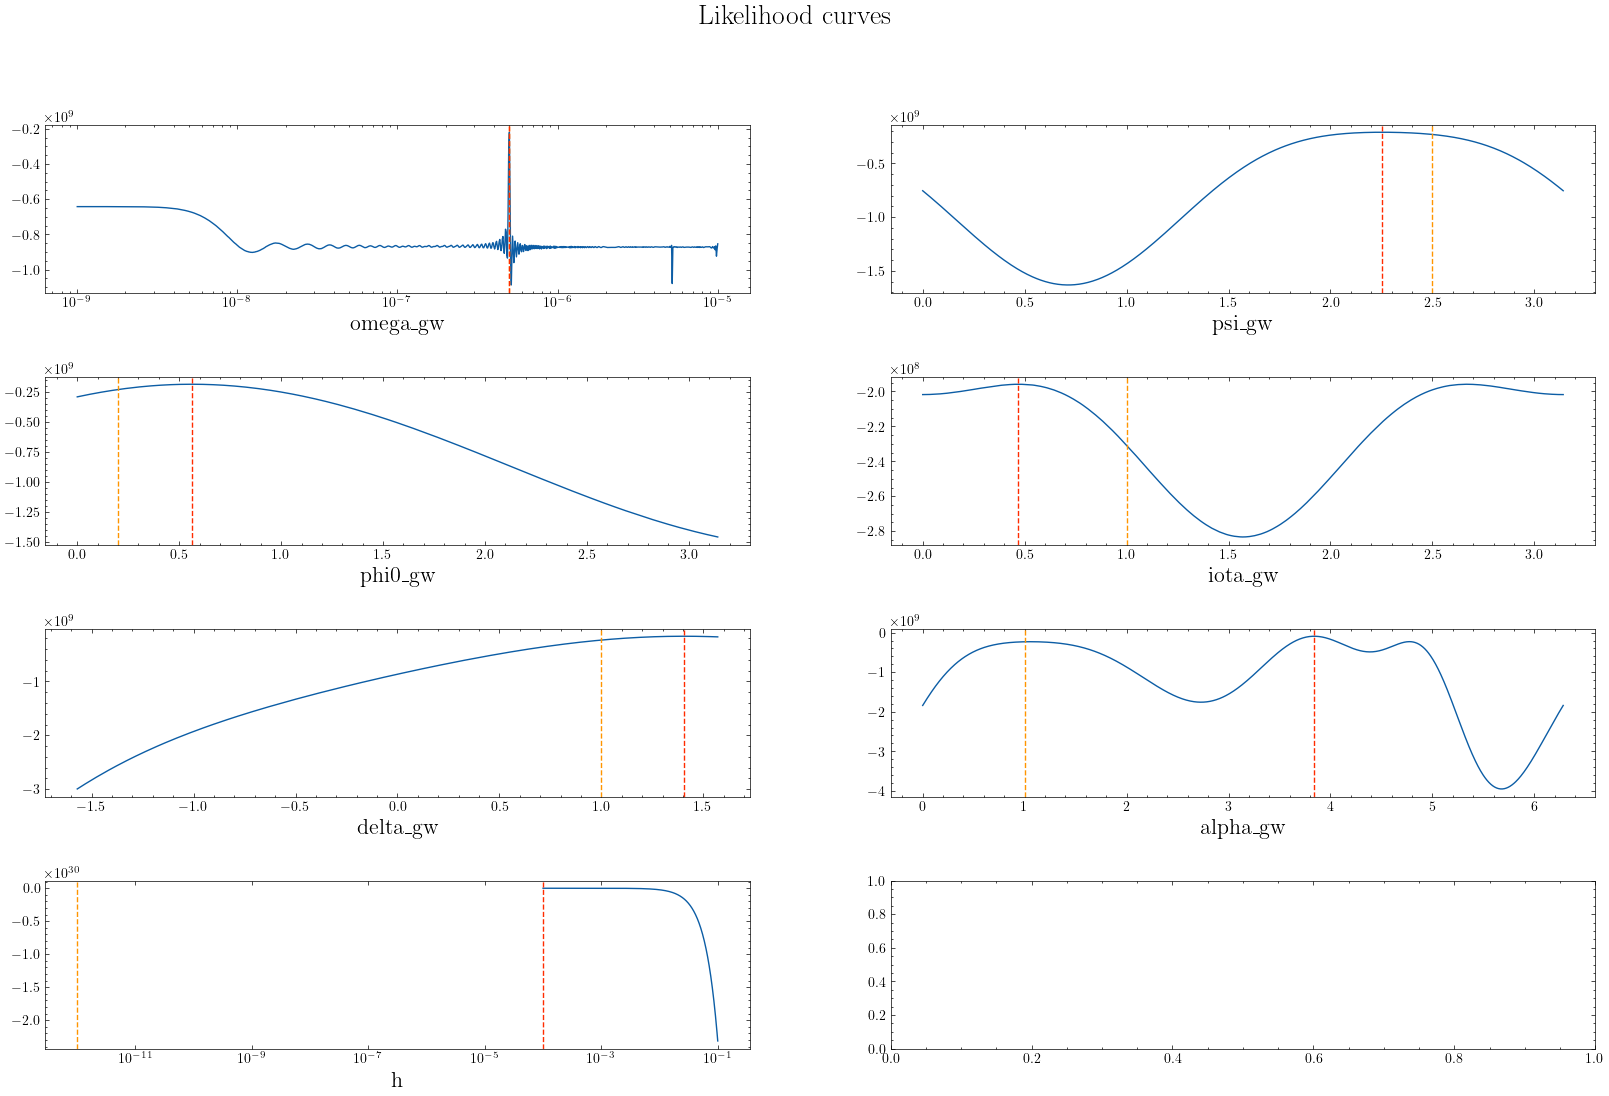

In [25]:
selected_parameters = ["omega_gw",
                       "psi_gw",
                        "phi0_gw",
                        "iota_gw",
                        "delta_gw",
                        "alpha_gw",
                        "h"]
parameters_dict = {k: guessed_parameters[k] for k in selected_parameters}


nsamples = int(1e3)

priors = [np.logspace(-9,-5,nsamples),                   # omega
          np.linspace(0,np.pi,nsamples),               # psi
          np.linspace(0,np.pi,nsamples),               # phi0
          np.linspace(0,np.pi,nsamples),               # iota
          np.linspace(-np.pi/2.0,np.pi/2.0,nsamples),    # delta
          np.linspace(0,2*np.pi,nsamples),               # alpha
          np.logspace(-4,-1,nsamples),                   # h
]

from plotting import likelihoods_over_priors
likelihoods_over_priors(parameters_dict,priors,PTA,P,KF,"Likelihood curves", savefig="all_likelihood_curves")


In [26]:
mins = 760*np.pi*1e5/500

In [27]:
mins/(60*24)

331.61255787892264